In [1]:
!pip install matplotlib mpmath numpy pandas sympy bokeh
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


<ipython-input-2-6c95e180f9fe>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world_cup['year'] = pd.DatetimeIndex(df_world_cup['date']).year


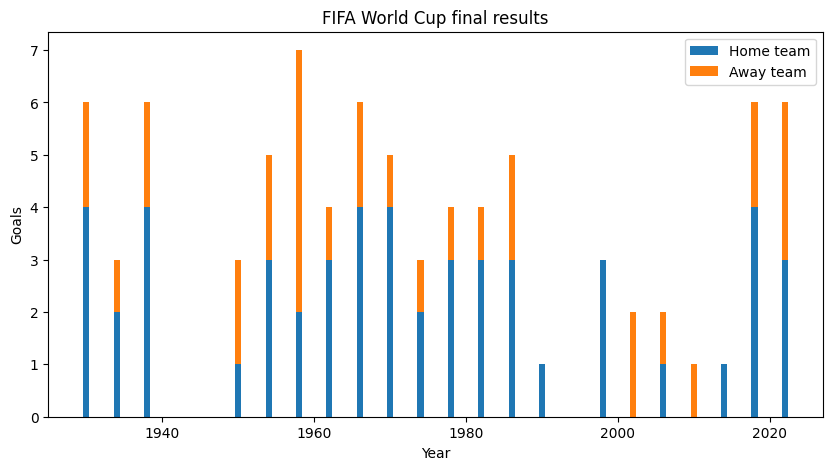

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the data from the CSV file into a Pandas DataFrame
data_file = '/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/fifa_results.csv'
df = pd.read_csv(data_file)
# parsing dates
df['date'] = pd.to_datetime(df['date'],errors='coerce',format='%Y-%m-%d')
df['Year'] = df['date'].dt.year

# Filter the DataFrame to include only data from the FIFA World Cup tournament
df_world_cup = df[df['tournament'] == 'FIFA World Cup']

# Extract the year from the date column
df_world_cup['year'] = pd.DatetimeIndex(df_world_cup['date']).year

# Find the last match of each year
finals = df_world_cup.loc[df_world_cup.groupby('year')['date'].idxmax()]

# Plot the data as a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(finals['year'], finals['home_score'], label='Home team')
ax.bar(finals['year'], finals['away_score'], bottom=finals['home_score'], label='Away team')

# Set the title and axis labels
ax.set_title('FIFA World Cup final results')
ax.set_xlabel('Year')
ax.set_ylabel('Goals')

# Add a legend
ax.legend()

plt.show()

"Make and stacked bar plot with the score of the world cups finals over the years.
Use fifa_results.csv "